In [1]:
#libs
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#locateDir
Sources = "Datasets"
Chicken_shit_SRC = os.path.join(Sources, "Chickenshit/")
Lumpycow_SRC = os.path.join(Sources, "lumpycowarch/")
Chicken_cocchi_SRC = os.path.join(Chicken_shit_SRC, "Cocchi/")
Chicken_NCD_SRC = os.path.join(Chicken_shit_SRC, "NCD/")
Chicken_Salmo_SRC = os.path.join(Chicken_shit_SRC, "Salmo/")
Healthy_Chicken_SRC = os.path.join(Chicken_shit_SRC, "Healthy/")
Cow_Lumpy_SRC = os.path.join(Lumpycow_SRC, "lumpy/")
Healthy_Cow_SRC = os.path.join(Lumpycow_SRC, "healthy/")
root_dir = "Capston"
Train_dir = os.path.join(root_dir, "Training/")
Validation_dir = os.path.join(root_dir, "Validation/")
Chicken_cocchi_train = os.path.join(Train_dir, "Chicken_Cocchi/")
Chicken_cocchi_valid = os.path.join(Validation_dir, "Chicken_Cocchi/")
Chicken_NCD_train = os.path.join(Train_dir, "Chicken_NCD/")
Chicken_NCD_valid = os.path.join(Validation_dir, "Chicken_NCD/")
Chicken_Salmo_train = os.path.join(Train_dir, "Chicken_Salmo/")
Chicken_Salmo_valid = os.path.join(Validation_dir, "Chicken_Salmo/")
Cow_Lumpy_train = os.path.join(Train_dir, "Cow_lumpy/")
Cow_Lumpy_valid = os.path.join(Validation_dir, "Cow_lumpy/")
Healthy_Chicken_train = os.path.join(Train_dir, "Healthy_chicken/")
Healthy_Chicken_valid = os.path.join(Validation_dir, "Healthy_chicken/")
Healthy_Cow_train = os.path.join(Train_dir, "Healthy_cow/")
Healthy_Cow_valid = os.path.join(Validation_dir, "Healthy_cow/")

In [3]:
#simplified Directory clear
Directories = [Chicken_cocchi_train, Chicken_cocchi_valid, Chicken_NCD_train, Chicken_NCD_valid, Chicken_Salmo_train, Chicken_Salmo_valid, Cow_Lumpy_train, Cow_Lumpy_valid, Healthy_Chicken_train, Healthy_Chicken_valid, Healthy_Cow_train, Healthy_Cow_valid]

for directory in Directories:
    if len(os.listdir(directory)) > 0:
        for file in os.scandir(directory):
            os.remove(file.path)

In [4]:
split_size = 0.8

In [5]:
#data_splitting
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

  files = []
  for filename in os.listdir(SOURCE_DIR):
    file = SOURCE_DIR + filename
    if os.path.getsize(file)>0:
      files.append(filename)
    else:
      print(filename + " is zero")
  
  train_length = int(len(files)*SPLIT_SIZE)
  test_length = int(len(files)-train_length)
  shuffle_set = random.sample(files, len(files))
  train_set = shuffle_set[0:train_length]
  test_set = shuffle_set[-test_length:]

  for filename in train_set:
    this_file = SOURCE_DIR + filename
    destination = TRAINING_DIR + filename
    shutil.copyfile(this_file, destination)

  for filename in test_set:
    this_file = SOURCE_DIR + filename
    destination = VALIDATION_DIR + filename
    shutil.copyfile(this_file, destination)

In [6]:
##passing image to the files
#soure_direct = [Chicken_cocchi_SRC, Chicken_NCD_SRC, Chicken_Salmo_SRC, Cow_Lumpy_SRC, Healthy_Chicken_SRC, Healthy_Cow_SRC]
#train_direct = [Chicken_cocchi_train, Chicken_NCD_train, Chicken_Salmo_train, Cow_Lumpy_train, Healthy_Chicken_train, Healthy_Cow_train]
#valid_direct = [Chicken_cocchi_valid, Chicken_NCD_valid, Chicken_Salmo_valid, Cow_Lumpy_valid, Healthy_Chicken_valid, Healthy_Cow_valid]
#for source_SRC in soure_direct:
 #   for train_Dir in train_direct:
  #      for valid_dir in valid_direct:
   #         split_data(source_SRC, train_Dir, valid_dir, split_size)
            
split_data(Chicken_cocchi_SRC, Chicken_cocchi_train, Chicken_cocchi_valid, split_size)
split_data(Chicken_NCD_SRC, Chicken_NCD_train, Chicken_NCD_valid, split_size)
split_data(Chicken_Salmo_SRC, Chicken_Salmo_train, Chicken_Salmo_valid, split_size)
split_data(Cow_Lumpy_SRC, Cow_Lumpy_train, Cow_Lumpy_valid, split_size)
split_data(Healthy_Chicken_SRC, Healthy_Chicken_train, Healthy_Chicken_valid, split_size)
split_data(Healthy_Cow_SRC, Healthy_Cow_train, Healthy_Cow_valid, split_size)

In [7]:
for directory in Directories:
   print(f"{[directory]} has {len(os.listdir(directory))} images")

['Capston\\Training/Chicken_Cocchi/'] has 1980 images
['Capston\\Validation/Chicken_Cocchi/'] has 495 images
['Capston\\Training/Chicken_NCD/'] has 449 images
['Capston\\Validation/Chicken_NCD/'] has 113 images
['Capston\\Training/Chicken_Salmo/'] has 2100 images
['Capston\\Validation/Chicken_Salmo/'] has 525 images
['Capston\\Training/Cow_lumpy/'] has 336 images
['Capston\\Validation/Cow_lumpy/'] has 85 images
['Capston\\Training/Healthy_chicken/'] has 1923 images
['Capston\\Validation/Healthy_chicken/'] has 481 images
['Capston\\Training/Healthy_cow/'] has 412 images
['Capston\\Validation/Healthy_cow/'] has 103 images


In [8]:
#data augment
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode="nearest")
  
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=45,
                                                      class_mode="binary",
                                                      target_size=(150, 150))

  validation_datagen = ImageDataGenerator(rescale = 1./255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=5,
                                                                class_mode="binary",
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [9]:
#model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(.3),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(6)
    ]
)

In [10]:
#train_gen

train_generator, valid_generator = train_val_generators(Train_dir, Validation_dir)

Found 7200 images belonging to 6 classes.
Found 1802 images belonging to 6 classes.


In [11]:
#compile it
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer="Adam", loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics= ["accuracy"])

In [12]:
history = model.fit(train_generator, epochs=30, validation_data=valid_generator)

Epoch 1/30
160/160 [==============================] - 85s 525ms/step - loss: 1.1477 - accuracy: 0.5760 - val_loss: 0.8126 - val_accuracy: 0.6998
Epoch 2/30
160/160 [==============================] - 52s 327ms/step - loss: 0.8527 - accuracy: 0.6911 - val_loss: 0.7010 - val_accuracy: 0.7336
Epoch 3/30
160/160 [==============================] - 54s 337ms/step - loss: 0.7356 - accuracy: 0.7276 - val_loss: 0.7918 - val_accuracy: 0.7364
Epoch 4/30
160/160 [==============================] - 54s 334ms/step - loss: 0.6513 - accuracy: 0.7656 - val_loss: 0.5300 - val_accuracy: 0.8335
Epoch 5/30
160/160 [==============================] - 54s 335ms/step - loss: 0.5892 - accuracy: 0.7921 - val_loss: 0.4566 - val_accuracy: 0.8535
Epoch 6/30
160/160 [==============================] - 54s 337ms/step - loss: 0.5339 - accuracy: 0.8112 - val_loss: 0.4463 - val_accuracy: 0.8441
Epoch 7/30
160/160 [==============================] - 58s 361ms/step - loss: 0.5153 - accuracy: 0.8132 - val_loss: 0.5805 - val_ac

<function matplotlib.pyplot.show(close=None, block=None)>

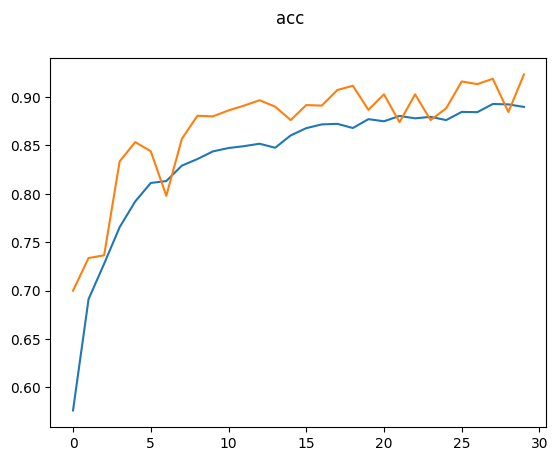

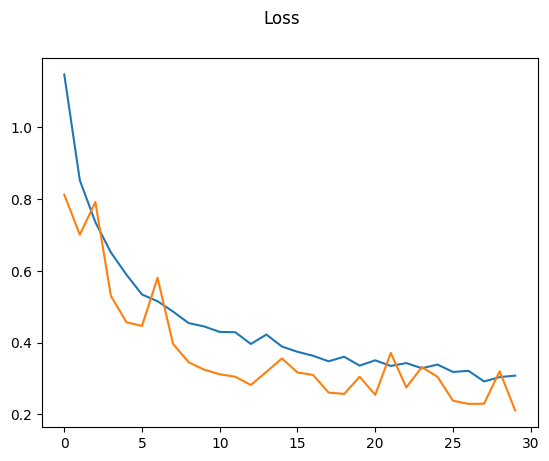

In [13]:
fig = plt.figure()
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label = "val acc")
fig.suptitle("acc")
plt.show
fig = plt.figure()
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label = "val loss")
fig.suptitle("Loss")
plt.show

In [14]:
model.save("Model/capstoneTestmodel/bare_model_test.h5")

In [19]:
!tensorflowjs_converter --input_format=keras Model/capstoneTestmodel/bare_model_test.h5 Model/capstoneTestmodel/bare_model